In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# CNN is for images

In [ ]:
data = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 170s 1us/step


In [37]:
(trainFeatures, trainTarget), (testFeatures, testTarget) = data

In [55]:
print(data[1]) # 1 image
print('------------------------')
print(trainFeatures[1].shape)

(array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
       

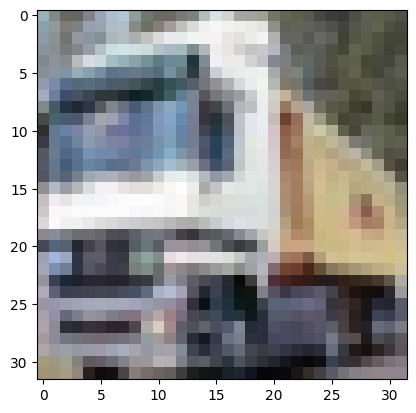

In [39]:
import matplotlib.pyplot as plt

plt.imshow(trainFeatures[1])

In [40]:
# https://www.cs.toronto.edu/~kriz/cifar.html

print(trainTarget)

animals = [2, 3, 4, 5, 6, 7]
vehicles = [0, 1, 8, 9]

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
trainTarget = trainTarget.flatten()

for i in range(len(trainTarget)):
    if trainTarget[i] in animals:
        trainTarget[i] = 0
    else:
        trainTarget[i] = 1

print(trainTarget)

[0 1 1 ... 1 1 1]


In [ ]:
trainTarget = to_categorical(trainTarget, 2)

print(trainTarget)

[[[0. 1.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 ...

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]


In [47]:
testTarget = testTarget.flatten()

for i in range(len(testTarget)):
    if testTarget[i] in animals:
        testTarget[i] = 0
    else:
        testTarget[i] = 1

testTarget = to_categorical(testTarget, 2)

In [ ]:
trainFeatures, testFeatures = trainFeatures/255, testFeatures/255

print(trainFeatures)

[[[[3.55820914e-06 3.73913502e-06 3.79944365e-06]
   [2.59327106e-06 2.77419695e-06 2.71388832e-06]
   [3.01543147e-06 2.89481421e-06 2.59327106e-06]
   ...
   [9.52876345e-06 7.96073908e-06 6.51333198e-06]
   [9.16691167e-06 7.53857868e-06 6.15148020e-06]
   [8.92567715e-06 7.47827005e-06 6.21178883e-06]]

  [[9.64938071e-07 1.20617259e-06 1.20617259e-06]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [1.08555533e-06 4.82469035e-07 0.00000000e+00]
   ...
   [7.41796142e-06 5.30715939e-06 3.31697462e-06]
   [7.17672690e-06 5.00561624e-06 3.01543147e-06]
   [7.35765279e-06 5.24685076e-06 3.43759188e-06]]

  [[1.50771574e-06 1.44740711e-06 1.26648122e-06]
   [9.64938071e-07 4.22160406e-07 0.00000000e+00]
   [2.95512284e-06 1.62833299e-06 4.82469035e-07]
   ...
   [7.11641827e-06 5.06592487e-06 3.01543147e-06]
   [7.23703553e-06 5.06592487e-06 3.01543147e-06]
   [6.57364061e-06 4.40252995e-06 2.53296244e-06]]

  ...

  [[1.25441949e-05 1.02524670e-05 5.78962842e-06]
   [1.21220345e-

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # neurones, filter/kernel
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax') # amount of classes
])